In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
np.random.seed(42)
data = np.random.normal(loc=50,scale=10,size=100)
outliers = np.array([10,110,5,120])
data = np.concatenate([data,outliers])

In [3]:
df = pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [4]:
df

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466
...,...
99,47.654129
100,10.000000
101,110.000000
102,5.000000


# ***using scatter plot***

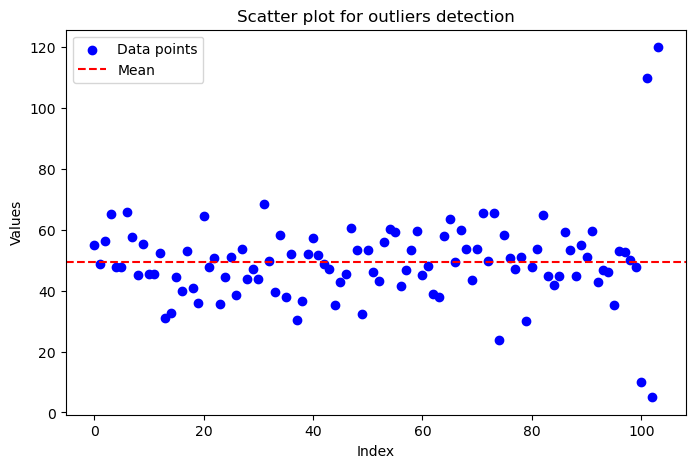

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')#mean line
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for outliers detection")
plt.legend()
plt.show()

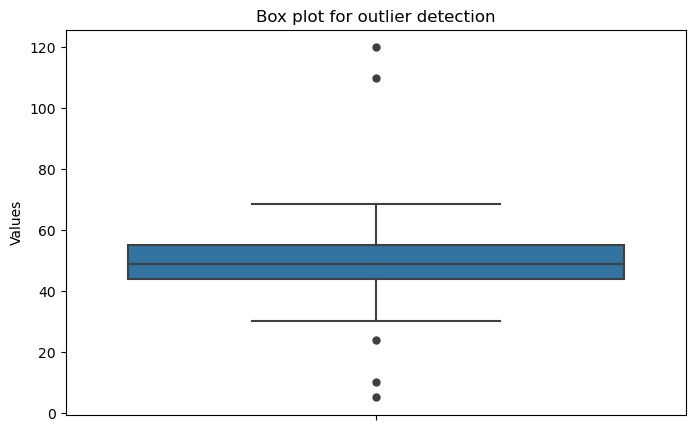

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values',flierprops=dict(marker='o'))
plt.title("Box plot for outlier detection")
plt.show()

# ***z-score method***
the z-score formula


z=x-µ/σ


where:


x = data point


µ = mean of the dataset


σ = standard deviation of the dataset


steps:


1.compute the z-score for each data point


2.if z-score >3 or z-score < -3, mark it as an outlier



In [12]:
df['z_score'] = zscore(df['Values'])
df['Outlier_z'] = df['z_score'].apply(lambda x : 'Outlier' if abs(x) > 3 else 'Normal' )
df[df['Outlier_z']=='Outlier']


,Values,z_score,Outlier_z
101,110.0,4.328173,Outlier
102,5.0,-3.175368,Outlier
103,120.0,5.042796,Outlier


# Interquartile Range (IQR ) method

IQR = Q3-Q1

Steps:

1.Calculate Q1 (25th percentile) and Q3 (75th percentile)

2.Compute IQR = Q3-Q1

3.define lower & upper bounds

** lower bound = Q1-1.5xIQR**
** upper bound = Q3+1.5xIQR**

4.Any value outside these bounds is an outlier

In [16]:
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
df['Outlier_IQR'] = df['Values'].apply(lambda x: 'Outlier' if (x < lower_bound or x> upper_bound) else 'Normal' )
df[df['Outlier_IQR']=='Outlier']

,Values,z_score,Outlier_z,Outlier_IQR
74,23.802549,-1.831694,Normal,Outlier
100,10.000000,-2.818056,Normal,Outlier
101,110.000000,4.328173,Outlier,Outlier
102,5.000000,-3.175368,Outlier,Outlier
103,120.000000,5.042796,Outlier,Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
 

**The Interquartile Range (IQR) is calculated as:**
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

In [19]:
import numpy as np
np.random.seed(42)
data = np.random.normal(loc=50,scale=10,size=100)
outliers = np.array([10,110,5,120])
data = np.concatenate([data,outliers])
Q1 = np.percentile(data,25)
Q2 = np.median(data)
Q3 = np.percentile(data,75)
min_value = np.min(data)
max_value = np.max(data)

IQR = Q3-Q1
lower_bound = Q1 - 1.5 + IQR
upper_bound = Q3 + 1.5 + IQR
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(f"5-number summary:\nmin : {min_value},Q1 :{Q1}, median(Q2): {Q2} , Q3 : {Q3} , max: {max_value}")
print(f"IQR: {IQR}")
print(f"lower bound:{lower_bound}, upper bound : {upper_bound}")
print(f"outliers: {outliers}")

5-number summary:
min : 5.0,Q1 :43.874401021766715, median(Q2): 48.73043708220287 , Q3 : 55.00852473036764 , max: 120.0
IQR: 11.134123708600924
lower bound:53.50852473036764, upper bound : 67.64264843896856
outliers: [ 48.61735699  47.65846625  47.65863043  45.30525614  45.36582307
  45.34270246  52.41962272  30.86719755  32.75082167  44.37712471
  39.8716888   53.14247333  40.91975924  35.87696299  47.742237
  50.67528205  35.75251814  44.55617275  51.1092259   38.49006423
  43.9936131   47.0830625   43.98293388  68.52278185  49.86502775
  39.42289071  37.7915635   52.08863595  30.40329876  36.71813951
  51.96861236  51.71368281  48.84351718  46.98896304  35.2147801
  42.80155792  45.39361229  53.4361829   32.36959845  53.24083969
  46.1491772   43.23078     41.60782477  46.90787624  53.31263431
  45.20825762  48.14341023  38.93665026  38.03793376  49.27989878
  43.54880245  49.64173961  23.80254896  50.87047068  47.0099265
  50.91760777  30.12431085  47.80328112  44.81729782  41.9150